In [1]:
import plotly.express as px
import pandas as pd
import plotly.io as pio

# !pip3 install kaleido


In [2]:
#plot ML predictions as heat map 
df = pd.read_csv("ml_base_0.9_5.csv")
#select to only last year 
df = df.loc[df['year']==2016]

In [10]:
fig = px.choropleth(df, 
                    locations='state', 
                    color='predict_proba',
                    hover_name='state', 
                    locationmode="USA-states",  # specify the state locations mode
                    color_continuous_scale="Oranges",  # color scale
                    title="ML Predictions for 90th-Percentile 5-Year Flooding Risk in 2016")

fig.update_layout(geo_scope='usa',
                 width=700,  # Set width
                height=600)  # limit map scope to USA
fig.show()

In [9]:
fig.write_image("figs_insur/ml_predictions_90th_5yr.png")

In [ ]:
#plot premiums 

In [11]:
# df = pd.read_csv("P_hist_0.8.csv")
# df = pd.read_csv("P_act_0.8.csv")#actual loss 
# df = pd.read_csv("P_ml_0.8.csv") #RO premium
df = pd.read_csv("P_cma_0.8.csv") #CMA premium 

#compute mean 
df1 = df.set_index('State').mean(axis=1).reset_index()

In [12]:
fig = px.choropleth(df1, 
                    locations='State', 
                    color=0,
                    hover_name='State', 
                    locationmode="USA-states",  # specify the state locations mode
                    color_continuous_scale="amp", 
                    title="CMA Avg Premium Between 2013-2022")

fig.update_layout(geo_scope='usa',
                 coloraxis=dict(cmin=0, cmax=800000000),
                 width=700,  # Set width
                height=600)  
fig.show()

In [13]:
#plot surplus and deficit as heat map 
df_hist = pd.read_csv("P_hist_0.8.csv")
df_act = pd.read_csv("P_act_0.8.csv")#actual loss 
df_ro = pd.read_csv("P_ml_0.8.csv") #RO premium 
# df_ro = pd.read_csv("P_ml_0.6.csv") #RO premium gamma2=0.6 
df_cma = pd.read_csv("P_cma_0.8.csv") #CMA premium 
#compute mean surplus 
# diff = df_ro.set_index('State') - df_act.set_index('State')
# diff = df_hist.set_index('State') - df_act.set_index('State')
diff = df_cma.set_index('State') - df_act.set_index('State')
diff = diff.mean(axis=1).reset_index().rename(columns={0:"Balance"})
print(diff.sum())

State      MDMTTXFLSCVAMINCNJOHILLAMOAZDEPANYCTGACAMSIAUT...
Balance                                    -830589721.941355
dtype: object


In [14]:
fig = px.choropleth(diff, 
                    locations='State', 
                    color='Balance',
                    hover_name='State', 
                    locationmode="USA-states",  # specify the state locations mode
                    color_continuous_scale="RdBu", 
                    title="CMA Premium Avg Balance Between 2013-2022")

fig.update_layout(geo_scope='usa',
                 coloraxis=dict(cmin=-900*1e6, cmax=0),
                 width=700,  # Set width
                height=600)  
fig.show()

In [38]:
#select top 8 most costly states 
top8 = df_act.set_index('State').sum(axis=1).sort_values(ascending=False).head(8)
top8

State
TX    9.277057e+09
LA    3.790032e+09
FL    1.931231e+09
NC    8.942742e+08
NJ    4.609962e+08
SC    4.542804e+08
PA    2.741754e+08
NY    2.493790e+08
dtype: float64

Text(0, 0.5, 'Cumulative premium over testing period')

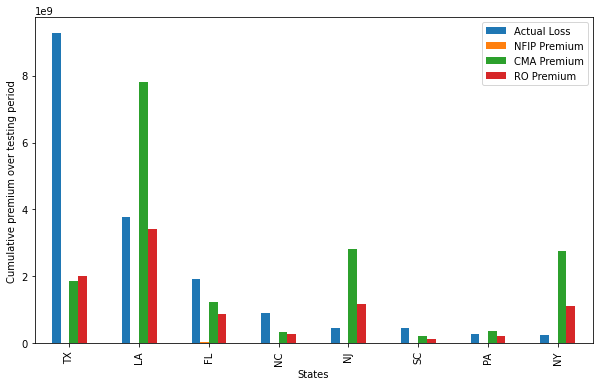

In [56]:
#compute the premium for those states: 
df = df_hist.copy()
df = df.loc[df['State'].isin(top8.index.to_list())]
s1 = df.set_index('State').sum(axis=1)

#compute the premium for those states: 
df = df_ro.copy()
df = df.loc[df['State'].isin(top8.index.to_list())]
s2 = df.set_index('State').sum(axis=1)

#compute the premium for those states: 
df = df_cma.copy()
df = df.loc[df['State'].isin(top8.index.to_list())]
s3 = df.set_index('State').sum(axis=1)

# Concatenate series to create a DataFrame
df = pd.concat([top8, s1, s2, s3], axis=1)

# Name columns
df.columns = ['Actual Loss', 'NFIP Premium', 'CMA Premium', 'RO Premium']

df.to_clipboard()

# Plotting
df.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
# plt.title('Bar Chart of Series1, Series2, and Series3')
plt.xlabel('States')
plt.ylabel('Cumulative premium over testing period')

In [26]:
df_hist = pd.read_csv("P_hist_0.8.csv")
df_act = pd.read_csv("P_act_0.8.csv")#actual loss 
df_ro = pd.read_csv("P_ml_0.8.csv") #RO premium 
# df_ro = pd.read_csv("P_ml_0.6.csv") #RO premium gamma2=0.6 
# df_cma = pd.read_csv("P_cma_0.8.csv") #CMA premium 

In [29]:
import matplotlib.pyplot as plt
sum_hist = df_hist.set_index('State').sum(axis=1)

State
MD     1076008.0
MT      119560.0
TX    19793715.0
FL    36164063.0
SC     2084667.0
VA     4335427.0
MI      842256.0
NC     5490227.0
NJ     3285858.0
OH      842162.0
IL     4535844.0
LA    12571661.0
MO      706092.0
AZ     1392484.0
DE      846029.0
PA     3990170.0
NY     7354500.0
CT     1263927.0
GA     1593524.0
CA     6430408.0
MS     2063365.0
IA     2307452.0
UT       29983.0
MN      274193.0
MA     1733775.0
AL      842682.0
KS      185226.0
SD       29492.0
AR      333850.0
WV      241847.0
RI      480836.0
WA      715176.0
OK      282098.0
OR     1519996.0
HI     1125965.0
ID      181813.0
TN      284452.0
CO      294283.0
IN      355242.0
KY      985570.0
ND      208787.0
WI      260544.0
NE      354318.0
NH      191591.0
NM      263821.0
NV      103258.0
DC       10380.0
VT       74290.0
ME      141849.0
AK       52013.0
VI       60815.0
PR       55261.0
WY       26032.0
dtype: float64

In [30]:
state_list = df_hist.State.unique()

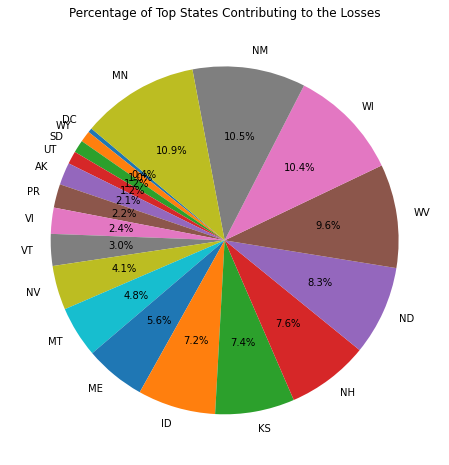

In [18]:
#join three dataframes 
